## Task 5.4
The algorithm as describes will numerically approximate $\pi$.
The basic idea is shooting arrows at a square. We can then devide the number of arrows that hit the unit circle (ie $x^2 + y^2 >= 1$) by the total number of arrows to get the fraction $A_{circle} / A_{square}$. Since we know that $A_{square} = 2^2 = 4$ we can calculate $\pi$ simply with $\pi \sim 4 * z / N$. <br>
This method can also be used for numerical integration.

We first define the algorithm as described (but vectorized for higher performance):

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def calc_pi(N):
    x, y = np.random.rand(2, N) * 2 - 1
    return 4 * (x**2 + y**2 <= 1).cumsum() / np.arange(1,N+1)

In [45]:
N = 1000000

print(f'Pi is approximatley {calc_pi(N)[-1]}')

Pi is approximatley 3.140968


We can visualize the approximation process:

Text(0, 0.5, 'z')

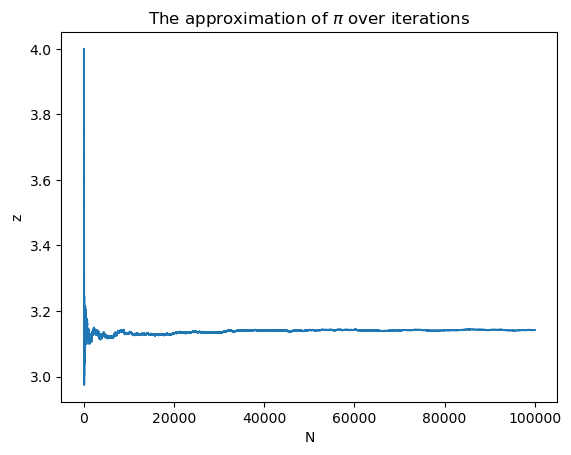

In [34]:
plt.figure()
plt.title('The approximation of $\pi$ over iterations')

plt.plot(calc_pi(100000))

plt.xlabel('N')
plt.ylabel('z')

and the estimated uncertainty for our approximation:

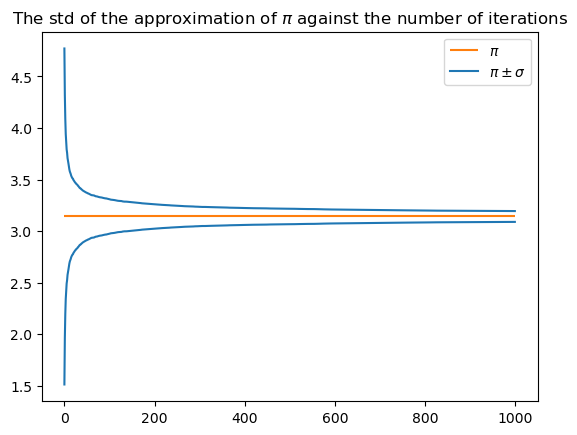

In [54]:
N = 1000
M = 1000

z = np.empty((M, N))
for i in range(M):
    z[i,:] = calc_pi(N)

plt.figure()
plt.title('The std of the approximation of $\pi$ against the number of iterations')

plt.hlines(np.pi, 0, N, color = '#ff7f0e', label = '$\pi$')

plt.plot(np.pi + z.std(axis=0), color = '#1f77b4', label = '$\pi \pm \sigma$')
plt.plot(np.pi - z.std(axis=0), color = '#1f77b4')

plt.legend()